### LUNG DISEASE DETECTION USING TRANSFER LEARNING

We are given the xray images for two cases, one is the xray images of normal condition and another is the xray images of pnuemonia cases. Using the xray images we will bulild a CNN model to classify the xray images to either being of normal condition or pneumonia cases.

Data can be accesed from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Visualizing Data

In [0]:
# importing images from train data
normal_images_list = glob('/content/drive/My Drive/chest_xray/train/NORMAL/*')
pneumonia_images_list = glob('/content/drive/My Drive/chest_xray/train/PNEUMONIA/*')

In [7]:
print(f'Number of images of normal xrays: {len(normal_images_list)}')
print(f'Number of images of pneumonia xrays: {len(pneumonia_images_list)}')

Number of images of normal xrays: 1341
Number of images of pneumonia xrays: 3875


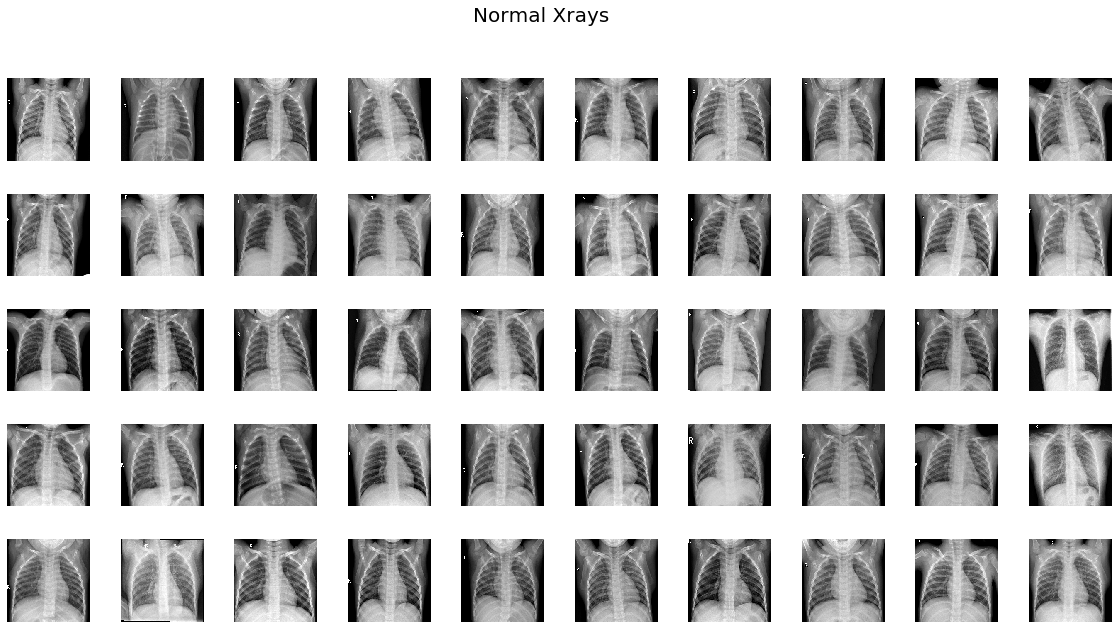

In [8]:
import random

# visualize random 50 normal xray images

# Define the dimension of the plot grid
W_grid = 10
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,10))
plt.suptitle('Normal Xrays', fontsize = 20)
axes = axes.ravel() # flatten the 10 x 5 matrix into array of length 50

# get the length of normal_images_list
n_normal = len(normal_images_list)

# plot a random image from the normal images
for i in np.arange(0, W_grid*L_grid):
    
    # select a random number
    index = random.randint(0, n_normal)
    # import the image
    sample_image_path = normal_images_list[index]
    sample_image = image.load_img(sample_image_path, target_size=(200,200))
    sample_image = np.array(sample_image)
    # display the image of the selected index
    axes[i].imshow(sample_image)
    #axes[i].set_title(labels[int(training[index, 0])],fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4,)

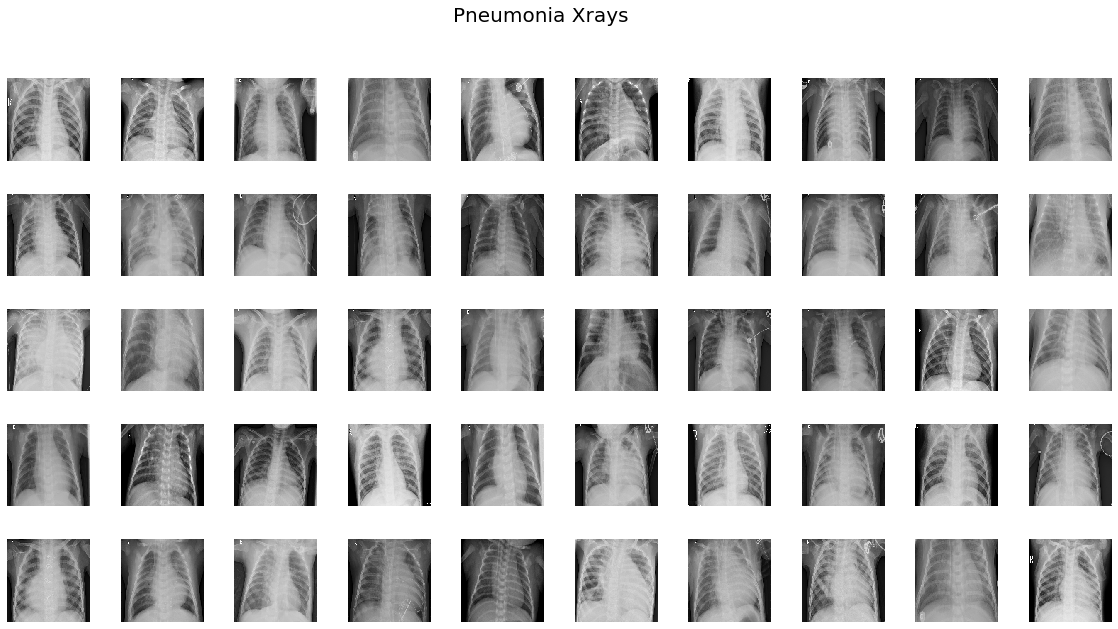

In [9]:
## visualize random 50 pnuemonia xray images

# Define the dimension of the plot grid
W_grid = 10
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,10))
plt.suptitle('Pneumonia Xrays', fontsize = 20)
axes = axes.ravel() # flatten the 10 x 5 matrix into array of length 50

# get the length of pnuemonia_images_list
n_pneumonia = len(pneumonia_images_list)

# plot a random image from the normal images
for i in np.arange(0, W_grid*L_grid):
    
    # select a random number
    index = random.randint(0, n_normal)
    # import the image
    sample_image_path = pneumonia_images_list[index]
    sample_image = image.load_img(sample_image_path, target_size=(200,200))
    sample_image = np.array(sample_image)
    # display the image of the selected index
    axes[i].imshow(sample_image)
    #axes[i].set_title(labels[int(training[index, 0])],fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4,)

### Modeling

We will be using VGG16 model for the transfer learning. Lets have a look at the summary of the VGG16 model.

In [10]:
VGG16().summary()

553467904/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [0]:
# setting the imput shape of the images
image_size = [224,224]

In [12]:
# setting the VGG16 model
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# setting the layers to be non-trainable
for layer in vgg.layers:
  layer.trainable = False

In [0]:
# capturing the output from vgg16 model
x = Flatten()(vgg.output)

In [0]:
# adding our output layer
output_layer = Dense(units = 1, activation='sigmoid')(x)

In [0]:
# Initiate our model
model = Model(inputs = vgg.input, outputs = output_layer)

In [17]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Create the training and test data

In [0]:
# train and test data paths

train_path = '/content/drive/My Drive/chest_xray/train'
test_path = '/content/drive/My Drive/chest_xray/test'

In [0]:
# create train and test data generator
train_datagen= ImageDataGenerator(rescale=1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# generate train and test data
train_data = train_datagen.flow_from_directory(train_path, target_size=(224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 5216 images belonging to 2 classes.


In [25]:
test_data = test_datagen.flow_from_directory(test_path, target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Found 624 images belonging to 2 classes.


### Train the model

In [26]:
history = model.fit_generator(train_data, 
                              validation_data=test_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_steps = len(test_data)
                              )

Epoch 1/5
163/163 [==============================] - 1969s 12s/step - loss: 0.1855 - accuracy: 0.9227 - val_loss: 0.2379 - val_accuracy: 0.9006
Epoch 2/5
163/163 [==============================] - 163s 1s/step - loss: 0.1104 - accuracy: 0.9580 - val_loss: 0.2265 - val_accuracy: 0.9199
Epoch 3/5
163/163 [==============================] - 162s 995ms/step - loss: 0.1029 - accuracy: 0.9628 - val_loss: 0.3428 - val_accuracy: 0.8926
Epoch 4/5
163/163 [==============================] - 158s 968ms/step - loss: 0.0932 - accuracy: 0.9655 - val_loss: 0.4031 - val_accuracy: 0.8830
Epoch 5/5
163/163 [==============================] - 159s 975ms/step - loss: 0.0913 - accuracy: 0.9678 - val_loss: 0.2325 - val_accuracy: 0.9151


### Learning Curve

In [0]:
# history.history

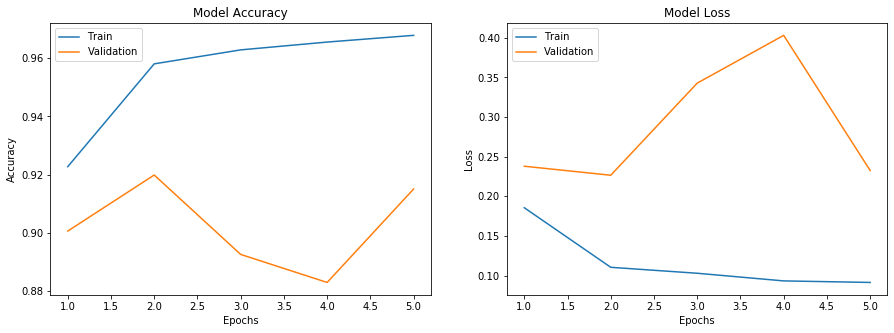

In [29]:
epoch_range = range(1,6)
fig = plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['accuracy'], label = "Train")
plt.plot(epoch_range, history.history['val_accuracy'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['loss'], label = "Train")
plt.plot(epoch_range, history.history['val_loss'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

After five epochs of training we have got a very good training accuracy of 96.78% but are validation accuracy is lower at 91.51%. So, there is some overfitting. We could train the model for more epochs.

### Evaluation

In [106]:
loss, accuracy = model.evaluate_generator(test_data)
acc = round(accuracy, 3)
print('Accuracy on test data: {}%'.format(str(acc)))

Accuracy on test data: 0.915%


In [0]:
# Make prediction and capture the prediction labels

# length of images to test
test_images = test_images_normal + test_images_pneumonia
n_sample = len(test_images)

# list to store the predicted class
predicted_class = []
for i in range(n_sample):
    sample_image_path = test_images[i]
    sample_image = image.load_img(sample_image_path, target_size=(224,224))
    sample_image = image.img_to_array(sample_image)
    # reshape the image
    sample_image = np.expand_dims(sample_image, axis = 0)
    # preprocess the image
    sample_image = preprocess_input(sample_image)
    # resacale the image
    sample_image = sample_image/255

    # prediction
    pred = model.predict(sample_image)

    # capture the class
    pred_class = int((pred > 0.5) + 0)

    predicted_class.append(pred_class)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39708d5710>)

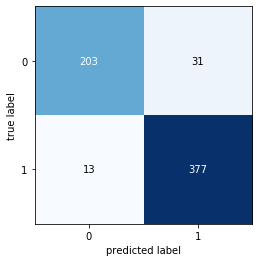

In [107]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
conf_mat = confusion_matrix(test_data.classes, predicted_class)
plot_confusion_matrix(conf_mat)

In [0]:
model.save('/content/drive/My Drive/model_vgg.h5')

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/model_vgg.h5')

### Compare Prediction Vs Actual

In [0]:
# load normal and pneumonia images from test data
test_images_normal = glob('/content/drive/My Drive/chest_xray/test/NORMAL/*')
test_images_pneumonia = glob('/content/drive/My Drive/chest_xray/test/PNEUMONIA/*')

In [0]:
# take 25 samples from both the classes
sample_normal = list(np.random.choice(test_images_normal,size = 25,replace=False))
sample_pneumonia = list(np.random.choice(test_images_pneumonia,size = 25,replace=False))

In [0]:
# combine the sample images
sample_images = sample_normal + sample_pneumonia

In [0]:
# labels of the sample images
# Normal = 0, Pneumonia = 1
label_normal = list(np.repeat(0, 25))
label_pneumonia = list(np.repeat(1,25))

# combine the labels
actual_labels = label_normal+label_pneumonia

In [0]:
# Make prediction and capture the prediction labels

# length of images to test
n_sample = len(sample_images)

# list to store the predicted class
predicted_class = []
for i in range(n_sample):
    sample_image_path = sample_images[i]
    sample_image = image.load_img(sample_image_path, target_size=(224,224))
    sample_image = image.img_to_array(sample_image)
    # reshape the image
    sample_image = np.expand_dims(sample_image, axis = 0)
    # preprocess the image
    sample_image = preprocess_input(sample_image)
    # resacale the image
    sample_image = sample_image/255

    # prediction
    pred = model.predict(sample_image)

    # capture the class
    pred_class = int((pred > 0.5) + 0)

    predicted_class.append(pred_class)


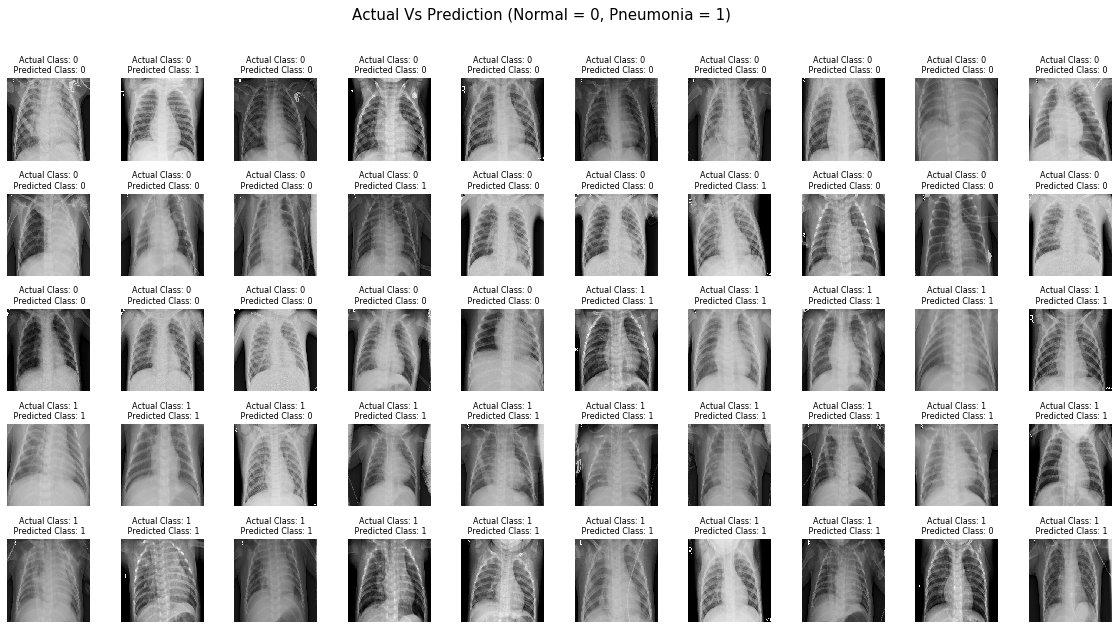

In [103]:
# plot actual vs prediction

# Define the dimension of the plot grid
W_grid = 10
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,10))
plt.suptitle('Actual Vs Prediction (Normal = 0, Pneumonia = 1)', fontsize = 15)
axes = axes.ravel() # flatten the 10 x 5 matrix into array of length 50

# plot the images
for i in np.arange(0, W_grid*L_grid):
    # import the image
    sample_image_path = pneumonia_images_list[i]
    sample_image = image.load_img(sample_image_path, target_size=(224,224))
    sample_image = np.array(sample_image)
    # plot the image  
    axes[i].imshow(sample_image, )
    axes[i].set_title(f'Actual Class: {actual_labels[i]}\n Predicted Class: {predicted_class[i]}', fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4,)

We can see from the plot that the model was able to correctly predict the class of the xray images in most of the cases with few wrong classifications.

In [0]:
#samp = test_images_pneumonia[1]
#samp = image.load_img(samp,target_size=(224,224))
#samp = image.img_to_array(samp)
#samp = np.expand_dims(samp, axis = 0)
#samp = preprocess_input(samp)
#samp = samp/255
#pred = model.predict(samp)
#pred